# Bot Hỗ Trợ Tuyển sinh đại học

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## RAG là gì?

**RAG** là viết tắt của **Retrieval Augmented Generation** (Tạo Tăng Cường Truy Xuất)


Rag được giới thiệu trong bài It was introduced in the paper [Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks](https://www.google.com/url?q=https%3A%2F%2Farxiv.org%2Fabs%2F2005.11401).


**Mỗi bước có thể được chia nhỏ thành:**

* **Retrieval** - Tìm kiếm thông tin có liên quan từ một nguồn cho một truy vấn. Ví dụ: lấy các đoạn văn bản Wikipedia có liên quan từ cơ sở dữ liệu cho một câu hỏi.
* **Augmented** - Sử dụng thông tin có liên quan đã lấy được để sửa đổi đầu vào thành một mô hình tạo (ví dụ: LLM).
* **Generation** - Tạo đầu ra cho một đầu vào. Ví dụ: trong trường hợp của LLM, tạo một đoạn văn bản cho một lời nhắc nhập.




## Tại sao dùng RAG ?
Mục tiêu chính của RAG là cải tiến đầu ra của LLM.  

Có 2 Cải Tiến chính của Rag do với LLM thông thường:
1. **Ngăn Ngừa Hallucinations(ảo giác)**: LLM dễ gây ra ảo giác tiềm ẩn, tức là tạo ra thứ gì đó có vẻ đúng nhưng không phải vậy. RAG pipeline có thể giúp LLM tạo ra nhiều đầu ra thực tế hơn bằng cách cung cấp cho chúng các đầu vào thực tế (đã truy xuất). Và ngay cả khi câu trả lời được tạo ra từ đường ống RAG có vẻ không đúng, do quá trình truy xuất, bạn cũng có thể truy cập vào các nguồn mà câu trả lời đó đến từ đó.

2. **Hoạt động với Dữ Liệu Tùy Chỉnh:**  Nhiều LLM cơ bản được đào tạo bằng dữ liệu văn bản quy mô internet. Điều này có nghĩa là chúng có khả năng mô hình hóa ngôn ngữ tuyệt vời, tuy nhiên, chúng thường thiếu kiến ​​thức cụ thể. Hệ thống RAG có thể cung cấp cho LLM dữ liệu theo lĩnh vực cụ thể như thông tin y tế hoặc tài liệu của công ty và do đó tùy chỉnh đầu ra của chúng để phù hợp với các trường hợp sử dụng cụ thể.

## Vì sao áp dụng RAG cho Trợ Lý Ảo cho tuyển sinh đại học
Vì RAG có thể truy cứu dữ liệu 1 cách tổng thể và hiệu quả. Cho phép LLM hiểu được và ghi nhớ bối cảnh của bài viết, chống dẫn tới ảo giác và đứa ra những phản hồi tốt tới đầu vào tùy chỉnh.

## Thuật Ngữ Chính

| **Term** | **Description** |
|----|----|
| **Token** | 1 đoạn text, VD "life, is good!" có thể chia thành ["life", ",", "is", "good", "!"]. <br> Một token có thể là 1 từ hoàn chỉnh hoặc 1 phần của từ hoặc 1 ký hiệu câu. <br> 1 token ~ 4 ký tự trong Tiếng Anh, 100 token ~ 75 từ. <br> Văn bản được chia thành các token trước khi được chuyển đến LLM. |
| **Embedding** | Chuyển hóa dữ liệu text sang dữ liệu số cho máy có thể đọc. <br> Dữ liệu số thường thuộc kiểu int hoặc là float. <br> VD, "life is good" thành {1232: b'life', 242: b'is', 132: b'good'} dùng Byte pair encoding (mã hóa cặp Byte). <br> Google có thư viện tokenization là  [SentencePiece](https://github.com/google/sentencepiece) |
| **Embedding model** | Mô hình được thiết kế để nhận dữ liệu đầu vào và đưa ra 1 biểu diễn số. <br> VD, 1 mô hình nhúng văn bản có thể lấy 384 token và biến nó thành 1 vector kích thước 768 (768 hàng). <br> note: 1 thường khác mô hình LLM. |
| **Similarity search/vector search** | "Tìm kiếm tương đồng / Tìm kiếm vector" nhằm mục đích tìm 2 vector gần nhau trong không gian n chiều. <br> VD, 2 văn bản có chủ đề tương tự sẽ có giá trị các vector gần nhau, trong khi 2 đoạn văn bản về 2 chủ đề khác nhau sẽ có giá trị các vector thấp. <br> (Mình gọi "điểm tương tự" của 2 token là "giá trị các vector"). <br> Các phép đo điểm tương tự phổ biến là tích vô hướng và độ tương tự cosin. |
| **Large Language Model (LLM)** | Mô hình học máy được đào tạo sâu có khả năng hiểu và tạo văn bản ngôn ngữ con người. <br> Nói sâu hơn, đây là 1 mô hình đc đào tạo để biểu diễn các mẫu (pattern) trong văn bản theo dạng số. <br> 1 LLM sinh sẽ sinh ra 1 chuỗi số khi đc cung cấp 1 chuỗi số (chuỗi số thường là đoạn văn bản sau khi embedding). <br> VD: được cung cấp 1 chuỗi văn bản "life is good", 1 LLM có thể tạo ra "I want to play today". <br> Mô hình dự đoán này phụ thuộc nhiều vào dữ liệu Huấn Luyện và Yêu Cầu của người dùng (User Prompt). |
| **LLM context window** | Số Lượng Tokens mà LLM có thể nhận. <br> VD, vào tháng 8 năm 2024 GPT-4o có Context Window mặc định là 8192 nghìn tokens. (khoảng 96 trang văn bản word). <br> Mô hình Gemma-7b-it mình dùng trong dự án (tháng 8 năm 2024) này có Context Window là 2048 tới 4096 token (24 trang văn bản). <br> Context Window hơn nghĩa là LLM (hoặc RAG pipeline) có thể nhận nhiều thông tin có liên quan hơn để hỗ trợ truy vấn mà không gây ra ảo giác cao. |
| **Prompt** | Một thuật ngữ để mô tả đầu vào cho LLM tạo sinh. Ý tưởng của "kỹ thuật nhắc nhở" [prompt engineering](https://www.google.com/url?q=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FPrompt_engineering) <br> là cấu trúc đầu vào dựa trên văn bản (hoặc dựa trên hình ảnh) cho LLM tạo sinh theo 1 cách cự thể để đầu ra được tạo ra là lý tưởng vs người gửi. <br> Kỹ thuật này có thể thực hiện được vì khả năng học trong ngữ cảnh của LLM, <br> tức là nó có thể sử dụng cách biểu diễn ngôn ngữ của mình để phân tích nhắc và nhận ra đầu vào phù hợp có thể là gì. |

## Chúng ta sẽ xây dựng những gì ?

Chúng ta sẽ xây dựng đường ống RAG cho phép chúng ta trò chuyện với một tài liệu PDF về thông tin tuyển sinh.

Các phần ta sẽ Code:
1. Mở file PDF
2. Định dạng văn bản của file PDF để chuẩn bị cho mô hình nhúng (quy trình này gọi là Chunking phân tách/phân đoạn văn bản)
3. Nhúng tất cả các đoạn văn bản và chuyển chúng thành biểu diễn số (vector) để lưu trữ sử dụng sau.
4. Xây dựng 1 hệ thống truy xuất sử dụng tìm kiếm vector để tìm các đoạn văn bản có liên quan dựa trên truy vấn
5. Tạo lời nhắc (prompt) kết hợp các đoạn văn bản đã truy xuất.
6. Tạo câu trả lời cho truy vấn xuất dựa trên đoạn trích từ PDF.

Các Bước trên có thể chia thành 2 phần chính:
1. "Tiền Xử Lý / Nhúng" tài liệu (bước 1 - 3).
2. Tìm và trả lời câu hỏi (bước 4 - 6).

Đây là cấu trúc chúng ta sẽ đi theo:
<img src="https://docs.aws.amazon.com/images/sagemaker/latest/dg/images/jumpstart/jumpstart-fm-rag.jpg" alt="flowchart of a local RAG workflow" />

Tài liệu tham khảo của cấu trúc trên: https://developer.nvidia.com/blog/rag-101-demystifying-retrieval-augmented-generation-pipelines/


## Tải Các Yêu Cầu và Thiết Lập Môi Trường

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.11 python3.11-dev python3.11-distutils libpython3.11-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [70.9 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.

In [ ]:
# Perform Google Colab installs (if running in Google Colab)
import os

if "COLAB_GPU" in os.environ:
    print("[INFO] Running in Google Colab, installing requirements.")
    !pip install -U torch # requires torch 2.1.1+ (for efficient sdpa implementation)
    !pip install PyMuPDF # for reading PDFs with Python
    !pip install tqdm # for progress bars
    !pip install sentence-transformers # for embedding models
    !pip install accelerate # for quantization model loading
    !pip install bitsandbytes # for quantizing models (less storage space)
    !pip install flash-attn --no-build-isolation # for faster attention mechanism = faster LLM inference

[INFO] Running in Google Colab, installing requirements.


# 1. Xử lý và nhúng tài liệu/văn bản
Nguyên Liệu:

* Tài Liệu PDF tùy chọn.
* Mô hình Nhúng tùy chọn.

Các Bước:

* Import tài liệu PDF .
* Xử lý văn bản để nhúng (e.g. chia văn bản thành các câu).
* Nhúng các đoạn văn bản vào mô hình nhúng.
* Lưu trữ vào tệp để sử dụng sau.


### Tải Văn Bản PDF
Chúng ta sẽ dùng 1 bộ data về tuyển sinh đại học

In [ ]:
!pip install bs4

In [ ]:
# Download PDF file
import os
import requests

# Get PDF document
pdf_path = "/content/drive/MyDrive/AI_DATA/Thông Tin Tuyển Sinh.pdf"

# Download PDF if it doesn't already exist
if not os.path.exists(pdf_path):
  print("File doesn't exist")
else:
  print(f"File {pdf_path} exists.")

File /content/drive/MyDrive/AI_DATA/Thông Tin Tuyển Sinh.pdf exists.


In [ ]:
!pip install fitz
!pip install --force-reinstall pymupdf

  Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (20.0 MB)
  Attempting uninstall: pymupdf
    Found existing installation: PyMuPDF 1.25.5
    Uninstalling PyMuPDF-1.25.5:
      Successfully uninstalled PyMuPDF-1.25.5


In [ ]:
# Run this is you got ModuleNotFoundError: No module named 'frontend'
!pip install --force-reinstall pymupdf

  Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (20.0 MB)
  Attempting uninstall: pymupdf
    Found existing installation: PyMuPDF 1.25.5
    Uninstalling PyMuPDF-1.25.5:
      Successfully uninstalled PyMuPDF-1.25.5


Sau khi có được file PDF mình sẽ dùng thư viện fitz để mở và xem qua file PDF để hiểu hơn về nó.

In [ ]:
import fitz # (pymupdf, found this is better than pypdf for our use case)
from tqdm.auto import tqdm # for progress bars visualization, requires !pip install tqdm

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""
    cleaned_text = text.replace("\n", " ").strip() # strip "line break" with a "space"

    return cleaned_text

# Open PDF and get lines/pages
# Note: this only focuses on text, rather than images/figures etc
def open_and_read_pdf(pdf_path: str) -> list[dict]:
    """
    Opens a PDF file, reads its text content page by page, and collects statistics.

    Parameters:
        pdf_path (str): The file path to the PDF document to be opened and read.

    Returns:
        list[dict]: A list of dictionaries, each containing the page number
        (adjusted), character count, word count, sentence count, token count, and the extracted text
        for each page.
    """
    doc = fitz.open(pdf_path)  # open a document
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):  # iterate the document pages
        text = page.get_text()  # get plain text encoded as UTF-8
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number  ,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,  # 1 token = ~4 chars, see: https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:3]

0it [00:00, ?it/s]

[{'page_number': 0,
  'page_char_count': 2301,
  'page_word_count': 501,
  'page_sentence_count_raw': 17,
  'page_token_count': 575.25,
  'text': 'Thông Tin Tuyển Sinh  Trường Đại học CMC, thành lập năm 2011 và đổi tên vào năm 2022, là thành viên của Tập  đoàn Công nghệ CMC, định hướng trở thành đại học số hàng đầu châu Á vào năm 2033.  Năm 2025, trường tuyển sinh 1510 chỉ tiêu, tập trung vào các ngành như Công nghệ Thông  tin, Khoa học Máy tính, Trí tuệ Nhân tạo, và Ngôn ngữ.  Các phương thức xét tuyển bao gồm:  •  CMC401: Dựa trên kỳ thi CMC-TEST 2025 (30 câu Toán, 30 câu Tiếng Anh, 20 câu  Tư duy logic), diễn ra Đợt 1 vào ngày 29/3/2025, đề minh họa tại [đề minh họa CMC- TEST]([invalid url, do not cite]de-minh-hoa-ky-thi-danh-gia-nang-luc-truong-dai-hoc- cmc-cmc-test-nam-2025/).  •  CMC200: Xét học bạ THPT, không cộng điểm ưu tiên, công thức: Ngành Kỹ thuật  (Toán×2 + Môn1 + Môn2), Ngành khác (Toán + Văn + Môn1 + Môn2).  •  CMC100: Dựa trên kết quả thi tốt nghiệp THPT, có thể cộng đ

lấy 1 tập mẫu ngẫu nhiên để trực quan hóa

In [ ]:
import random

random.sample(pages_and_texts, k=3) # return 3 random pages

[{'page_number': 9,
  'page_char_count': 1606,
  'page_word_count': 384,
  'page_sentence_count_raw': 21,
  'page_token_count': 401.5,
  'text': '•  Cây ATM của các ngân hàng lớn.  •  Wifi miễn phí phủ sóng toàn trường.  Xung quanh trường có nhiều tiện ích như quán ăn, siêu thị, phòng gym và nhà trọ, đáp ứng  nhu cầu sinh hoạt hàng ngày của sinh viên.  2. Phương thức tuyển sinh  Trường Đại học CMC áp dụng nhiều phương thức tuyển sinh linh hoạt để phù hợp với các  đối tượng thí sinh:  •  Xét tuyển học bạ: Dựa trên điểm trung bình các môn theo tổ hợp xét tuyển, yêu cầu  tối thiểu 6.0 trở lên (tùy ngành).  •  Xét tuyển dựa trên điểm thi tốt nghiệp THPT: Sử dụng kết quả kỳ thi THPT quốc  gia.  •  Xét tuyển thẳng: Dành cho thí sinh đạt giải học sinh giỏi hoặc có chứng chỉ quốc tế  (IELTS 6.0+, SAT, ACT, A-Level).  Điểm xét tuyển được tính dựa trên tổng điểm 3 môn theo tổ hợp hoặc điểm trung bình học  bạ, tùy phương thức. Trường không tổ chức kỳ thi đầu vào riêng, giúp giảm áp lực cho thí  s

### Lấy số liệu thống kê về văn bản
Điều này có nghĩa là mô hình đã được đào tạo để thu thập và chuyển thành văn bản nhúng với 800 tokens (1 tokens ~= 4 ký tự ~= 0,75 từ).

In [ ]:
import pandas as pd

df = pd.DataFrame(pages_and_texts) # Frame the Data
df.head() # Check few first data

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,0,2301,501,17,575.25,"Thông Tin Tuyển Sinh Trường Đại học CMC, thàn..."
1,1,2649,588,16,662.25,• Hỗ trợ học tiếng Anh miễn phí đạt chuẩn CEF...
2,2,2850,656,16,712.50,Loại Học Bổng Số Lượng Mức Giảm Tiêu Chí ...
3,3,2440,539,19,610.00,"viên cho thấy cơ sở vật chất hiện đại, đội ngũ..."
4,4,2568,589,15,642.00,Nội Quy Chế: Không tìm thấy thông tin công kha...


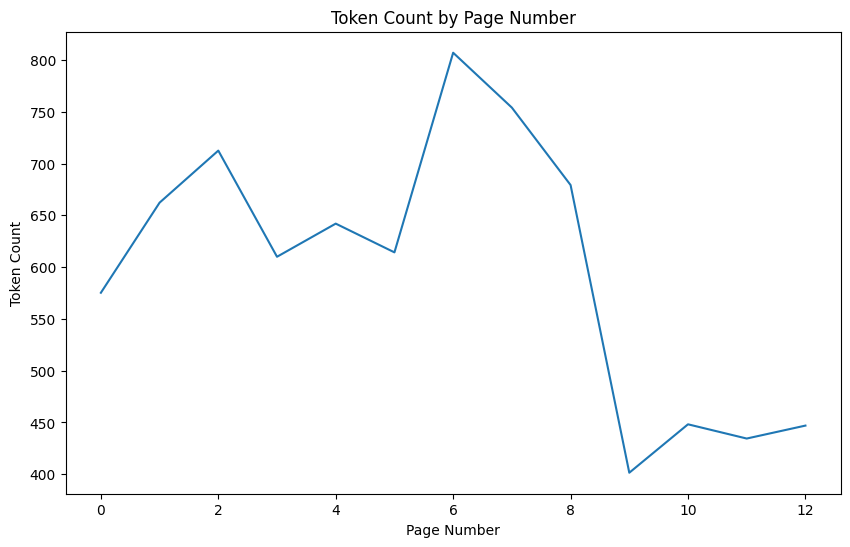

In [ ]:
# Token Count by Page Number

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['page_number'], df['page_token_count'])
plt.xlabel('Page Number')
plt.ylabel('Token Count')
_ = plt.title('Token Count by Page Number')

In [ ]:
# Get stats
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,13.00,13.00,13.00,13.00,13.00
mean,6.00,2396.23,549.23,19.08,599.06
std,3.89,523.16,113.91,2.96,130.79
min,0.00,1606.00,384.00,15.00,401.50
25%,3.00,1793.00,430.00,16.00,448.25
50%,6.00,2457.00,553.00,20.00,614.25
75%,9.00,2717.00,629.00,21.00,679.25
max,12.00,3228.00,738.00,24.00,807.00


**Mô tả trên cho chúng ta biết:** thông tin về số trang, ký tự, từ, số token từng trang trên tổng số trang là 13.

+ count: Số lượng trang không phải giá trị null trong mỗi cột
+ mean: Giá trị trung bình (mean) của mỗi cột.
+ std: Độ lệch chuẩn, đo lường lượng biến thiên hoặc độ phân tán.
+ min: Giá trị nhỏ nhất trong mỗi cột.
+ 25%: 25% trên tổng (còn được gọi là tứ phân vị thứ nhất), biểu thị rằng 25% điểm dữ liệu nhỏ hơn hoặc bằng giá trị này.
+ 50%: 50% trên tổng (còn được gọi là trung vị), biểu thị rằng 50% điểm dữ liệu nhỏ hơn hoặc bằng giá trị này.
+ 75%: 75% trên tổng (còn được gọi là tứ phân vị thứ ba), biểu thị rằng 75% điểm dữ liệu nhỏ hơn hoặc bằng giá trị này.
+ max: Giá trị lớn nhất trong từng cột.

Tải thư viện từ điển Tiếng Việt bằng spacy để có thể phân biệt các từ trong văn bản.

In [ ]:
!pip install pyvi

In [ ]:
!pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/packages/vi_core_news_lg-3.6.0/dist/vi_core_news_lg-3.6.0.tar.gz

  Using cached https://gitlab.com/trungtv/vi_spacy/-/raw/master/packages/vi_core_news_lg-3.6.0/dist/vi_core_news_lg-3.6.0.tar.gz (233.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached typer-0.9.4-py3-none-any.whl.metadata (14 kB)
Using cached typer-0.9.4-py3-none-any.whl (45 kB)
  Attempting uninstall: typer
    Found existing installation: typer 0.15.2
    Uninstalling typer-0.15.2:
      Successfully uninstalled typer-0.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.23.3 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.9.4 which is incompatible.
fastai 2.7.18 requires torch<2.6,>=1.10, but you have torch 2.6.0 which is incompatible.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.6.1 which is incompatible.


In [ ]:
#phiên bản numpy phù hợp
!pip uninstall numpy
!pip install numpy==1.26.4


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.23.3 requires typer<1.0,>=0.12; sys_platform != "emscripten", but

### Xử lý văn bản (Chia các trang thành các câu)

Trong phần , mình sẽ phá từng văn bản thành các, trung bình 1 trang có thể chia thành 5, 7 hoặc 10 câu.
Chúng ta thực hiện các bước sau:

`Nhận văn bản -> Chia thành các nhóm/chunks -> nhúng các nhóm/chunks -> dùng để nhúng`

Có 2 cách để chia văn bản thành các câu:
1. Dùng `text = .split("")` của python
2. Dùng thư viện spaCy hoặc nltk.

Vì sao phải chia thành các ?
+ Để xử lý nhanh gọn các văn bản lớn chứa nhiều ký tự.
+ Để có thể truy xuất từng nhóm các câu hiệu quả trong RAG pipeline.

In [ ]:
import spacy

# Assuming a valid Vietnamese model is installed (e.g., a custom one if vi_core_news_lg isn't real)
nlp = spacy.load('vi_core_news_lg')  # Replace with a real model if needed

# Add the sentencizer pipeline
nlp.add_pipe("sentencizer")

# Preprocess the text by adding a space after the comma
text = "Đây là một câu.Đây là một câu khác"  # Added space
doc = nlp(text)

# Check the number of sentences
sentences = list(doc.sents)
assert len(sentences) == 2, f"Expected 2 sentences, got {len(sentences)}"

# Print the sentences
for i, sent in enumerate(sentences):
    print(f"Sentence {i+1}: {sent.text}")

Sentence 1: Đây là một câu.
Sentence 2: Đây là một câu khác


In [ ]:
for item in tqdm(pages_and_texts): # tqlm to display loop as progress bar
    item["sentences"] = list(nlp(item["text"]).sents) # text into "sentences"

    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]] # convert sentence to string

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])


  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
print(pages_and_texts[4]["sentences"])

['Nội Quy Chế', ': Không tìm thấy thông tin công khai, có thể nằm trong cổng nội bộ, cần liên hệ  nhà trường.', 'Dựa trên thông lệ, nội quy thường bao gồm quy định học tập, đạo đức, kỷ luật.', ' Ưu Đãi:  •  Cam kết 100% việc làm cho sinh viên ngành công nghệ học hệ song ngữ, thực tập  tại Top 500 doanh nghiệp Việt Nam (VNR500) và đối tác quốc tế, với triết lý “True  internship – Good job”.', ' •  Cơ sở vật chất hiện đại: 6 phòng Lab với AI, AR/VR, hỗ trợ học tập từ năm nhất, hệ  thống IT tiên tiến như nhận diện khuôn mặt, đo nhiệt độ cơ thể.', ' •  Học phí cố định: Công nghệ Thông tin/Khoa học Máy tính 18,2 triệu VND/học kỳ;  Quản trị Kinh doanh 16,8 triệu VND/học kỳ; Ngôn ngữ Hàn/Japan 15,4 triệu VND/học  kỳ (2022-2023).', ' •  Hỗ trợ học tiếng Anh miễn phí đạt chuẩn CEFR B2, cơ hội thực tập quốc tế tại Nhật  Bản, Hàn Quốc, Hoa Kỳ.', '     Báo Cáo Chi Tiết: Thông Tin Tuyển Sinh, Nội Quy Chế và Ưu Đãi Cho Sinh Viên  Trường Đại học CMC  Trường Đại học CMC, thành lập vào năm 2011 với tên

In [ ]:
# Inspect an example
random.sample(pages_and_texts, k=1) # chọn random 1 trang

[{'page_number': 9,
  'page_char_count': 1606,
  'page_word_count': 384,
  'page_sentence_count_raw': 21,
  'page_token_count': 401.5,
  'text': '•  Cây ATM của các ngân hàng lớn.  •  Wifi miễn phí phủ sóng toàn trường.  Xung quanh trường có nhiều tiện ích như quán ăn, siêu thị, phòng gym và nhà trọ, đáp ứng  nhu cầu sinh hoạt hàng ngày của sinh viên.  2. Phương thức tuyển sinh  Trường Đại học CMC áp dụng nhiều phương thức tuyển sinh linh hoạt để phù hợp với các  đối tượng thí sinh:  •  Xét tuyển học bạ: Dựa trên điểm trung bình các môn theo tổ hợp xét tuyển, yêu cầu  tối thiểu 6.0 trở lên (tùy ngành).  •  Xét tuyển dựa trên điểm thi tốt nghiệp THPT: Sử dụng kết quả kỳ thi THPT quốc  gia.  •  Xét tuyển thẳng: Dành cho thí sinh đạt giải học sinh giỏi hoặc có chứng chỉ quốc tế  (IELTS 6.0+, SAT, ACT, A-Level).  Điểm xét tuyển được tính dựa trên tổng điểm 3 môn theo tổ hợp hoặc điểm trung bình học  bạ, tùy phương thức. Trường không tổ chức kỳ thi đầu vào riêng, giúp giảm áp lực cho thí  s

Mô tả trang vừa lấy được cho mình hiểu được độ phức tạp của 1 trang pdf và để giải quyết sự phức đó chúng ta có thể dùng chunking

In [ ]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,13.00,13.00,13.00,13.00,13.00,13.00
mean,6.00,2396.23,549.23,19.08,599.06,19.38
std,3.89,523.16,113.91,2.96,130.79,3.04
min,0.00,1606.00,384.00,15.00,401.50,14.00
25%,3.00,1793.00,430.00,16.00,448.25,16.00
50%,6.00,2457.00,553.00,20.00,614.25,20.00
75%,9.00,2717.00,629.00,21.00,679.25,22.00
max,12.00,3228.00,738.00,24.00,807.00,23.00


Thư viện spaCy chia từng câu bởi các dấu cách (vd: "," và ".")

Chúng ta đã chia thành câu văn bản thành các câu, tiếp theo ta sẽ gộp các câu đó lại thành các cụm/.

### Chia nhỏ các câu (Chunking)

Vì sao:
* Để dễ dàng quản lý các đoạn văn bản có kích thước tương tự.
* Không làm quá tải mô hình nhúng với các tokens   (note: nếu mô hình có khả năng nhận 384 tokens, mình có thể sẽ mất 1 số thông tin nếu cố nhúng 1 chuỗi hơn 400 tokens)
* Cửa sổ ngữ cảnh (Context windown - số lượng token LLM có thể nhận) có thể bị giới hạn và yêu cầu sức mạnh tính toán lớn hơn nên chúng ta muốn đảm bảo sự ổn định của mô hình.



In [ ]:
# Define split size to turn groups of sentences into chunks
num_sentence_chunk_size = 8

def split_list(input_list: list, slice_size: int) -> list[list[str]]:
    """
    Splits the input_list into sublists of size slice_size (or as close as possible).

    Parameters:
    - input_list: The list to be split into chunks.
    - slice_size: The number of items in each chunk.

    Returns:
    - A list of sublists, where each sublist contains up to slice_size elements.

    Example:
    A list of 17 sentences with a slice_size of 8 would be split into:
    [[sentence1, ..., sentence8], [sentence9, ..., sentence16], [sentence17]]
    """
    # Create a list of sublists, each with a maximum of slice_size elements
    return [
        # Summarize: For all sentences in a page, every 8 senteces -> slice 8 sentence as a chunks.

        # Create a chunk from the current start_index to start_index + slice_size
        input_list[start_index : start_index + slice_size] # ex: 0: 0+8, 8: 8+8, 24: 24 + 8

        # Iterate over the input list with step size equal to slice_size
        for start_index in range(0, len(input_list), slice_size) # ex: for 1 in range(start: 0, end: 9, step: 8)
    ]

# Loop through each page and its associated text data
for item in tqdm(pages_and_texts):
    # Split the sentences on the current page into chunks
    item["sentence_chunks"] = split_list(
        input_list=item["sentences"], # sentence of a page
        slice_size=num_sentence_chunk_size # chunk size
    )

    # Store the number of chunks created
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
pages_and_texts[12]['text']

'•  Phòng máy tính và thư viện mở cửa miễn phí.  •  Giáo trình điện tử miễn phí, sinh viên có thể mua bản in nếu cần.  Hỗ trợ đặc biệt  Sinh viên khuyết tật được hỗ trợ về cơ sở vật chất, học phí và phương pháp học tập phù  hợp.  8. Quy trình và thủ tục  •  Tra cứu kết quả xét tuyển: Qua website, email hoặc SMS.  •  Đăng ký tín chỉ: Trước kỳ học mới 2-3 tuần qua hệ thống sinh viên.  •  Học lại/cải thiện điểm: Đăng ký môn bị trượt hoặc muốn nâng điểm vào kỳ tiếp  theo.  •  Chuyển ngành: Nộp đơn tại phòng đào tạo, xét duyệt dựa trên điểm số và chỉ tiêu.  •  Bảo lưu học tập: Tối đa 2 năm, cần nộp đơn và lý do hợp lệ.  •  Hoàn học phí: Có chính sách hoàn theo giai đoạn nếu nghỉ học, liên hệ phòng tài  chính.  •  Giấy xác nhận sinh viên: Xin tại phòng đào tạo hoặc trực tuyến.  •  Nhập học: Thường khai giảng vào tháng 9, theo thông báo chính thức.  9. Các câu hỏi thường gặp khác  •  Tham quan trường: Liên hệ phòng tuyển sinh để đặt lịch hoặc tham gia Open Day.  •  Học quân sự: Bắt buộc, tổ c

In [ ]:
# Sample an example from the group (note: many pages have only 1 chunk as they have <=8 sentences total)
random.sample(pages_and_texts, k=1)

[{'page_number': 10,
  'page_char_count': 1793,
  'page_word_count': 430,
  'page_sentence_count_raw': 24,
  'page_token_count': 448.25,
  'text': '•  Công nghệ thông tin: Ch Favored chuyên ngành Trí tuệ nhân tạo (AI) và Khoa  học dữ liệu.  •  Công nghệ tài chính (Fintech).  •  Kinh doanh số.  •  Thiết kế đồ họa.  Ngoài ra, trường còn đào tạo các ngành ngôn ngữ như Hàn Quốc, Nhật Bản, Trung Quốc.  Sinh viên có thể học song ngành nếu đáp ứng điều kiện về điểm số và thời gian học tập.  4. Học phí và hỗ trợ tài chính  Học phí  Học phí tại Trường Đại học CMC dao động từ 40 - 60 triệu VNĐ/năm, tùy theo ngành học.  Sinh viên có thể đóng học phí theo từng kỳ hoặc từng đợt theo chính sách hỗ trợ của  trường.  Chương trình tiếng Anh  Sinh viên cần đạt trình độ tiếng Anh tương đương IELTS 6.0 để tốt nghiệp. Nếu chưa có  chứng chỉ (IELTS, TOEFL, PTE), sinh viên phải tham gia chương trình tiếng Anh của trường  với 6 cấp độ, mỗi cấp độ chi phí 10 triệu VNĐ.  Hỗ trợ tài chính  •  Học bổng: Dựa trên 

In [ ]:
# Create a DataFrame to get stats
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,6.00,2396.23,549.23,19.08,599.06,19.38,2.69
std,3.89,523.16,113.91,2.96,130.79,3.04,0.48
min,0.00,1606.00,384.00,15.00,401.50,14.00,2.00
25%,3.00,1793.00,430.00,16.00,448.25,16.00,2.00
50%,6.00,2457.00,553.00,20.00,614.25,20.00,3.00
75%,9.00,2717.00,629.00,21.00,679.25,22.00,3.00
max,12.00,3228.00,738.00,24.00,807.00,23.00,3.00


### Chia từng phần thành một mục riêng ( Tokenizer the each Sentence)


Ở trên thư viện spaCy đã giúp chia trang thành các câu, trong phần này mình sẽ tạo gộp 10 câu thành 1 nhóm cho từng từng

In [ ]:
import re

# Split each chunk into its own item
pages_and_chunks = [] # list of pages contain chunks
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]: # store the processed chunk in dict with key "sentence_chunks"
        chunk_dict = {} # store chunks of a page
        chunk_dict["page_number"] = item["page_number"] # Stores the page number associated with this chunk.

        # Join the sentences together into a paragraph-like structure, aka a chunk (so they are a single string)

        # remove double space with single space and join them in a single string
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        # ".A" -> ". A" for any full-stop/capital letter combo. (for spacy to recognize stop word better)
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        chunk_dict["sentence_chunk"] = joined_sentence_chunk # Stores the joined sentence chunk.

        # Get stats about the chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 characters

        pages_and_chunks.append(chunk_dict)

# How many chunks do we have?
len(pages_and_chunks)

  0%|          | 0/13 [00:00<?, ?it/s]

35

Let see the Chunk we have

In [ ]:
# View a random sample
random.sample(pages_and_chunks, k=1)

[{'page_number': 2,
  'sentence_chunk': 'Ngoài ra, học phí được cố định trong suốt khóa học, ví dụ: Công nghệ Thông tin và Khoa học Máy tính là 18,2 triệu VND/học kỳ; Quản trị Kinh doanh là 16,8 triệu VND/học kỳ; Ngôn ngữ Hàn/Japan là 15,4 triệu VND/học kỳ (dữ liệu áp dụng cho sinh viên nhập học 2022-2023). Sinh viên cũng được hỗ trợ học tiếng Anh miễn phí đạt chuẩn CEFR B2, một lợi ích không nhỏ cho sự phát triển nghề nghiệp. • Cam Kết Việc Làm: Một ưu đãi đáng chú ý là cam kết 100% việc làm cho sinh viên ngành công nghệ học hệ song ngữ sau khi tốt nghiệp, với cơ hội làm việc tại Tập đoàn CMC, Samsung, và các doanh nghiệp thuộc Top 500 Việt Nam (VNR500). Chương trình thực tập “True internship – Good job” đảm bảo giao việc thật, đánh giá thật, huấn luyện thật, giúp sinh viên tích lũy kinh nghiệm từ năm nhất. • Cơ Sở Vật Chất: Là đại học số đầu tiên của Việt Nam, trường đầu tư mạnh vào hạ tầng hiện đại, bao gồm 6 phòng Lab với công nghệ tiên tiến như AI Chatbot, thực tế ảo tăng cường (A

In [ ]:
# Get stats about our chunks
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,35.00,35.00,35.00,35.00
mean,6.34,870.86,185.46,217.71
std,3.82,366.86,76.79,91.72
min,0.00,304.00,67.00,76.00
25%,3.00,554.50,115.50,138.62
50%,7.00,797.00,172.00,199.25
75%,9.50,1150.50,245.00,287.62
max,12.00,1599.00,338.00,399.75


### Lọc số câu với Token thấp
Mình sẽ muốn kiểm tra các Chunk có số token thấp (khả năng là noise)

-> Bằng cách xem các trang với ít hơn 30 tokens (độ vài trung bình của 1 câu) và mình thấy rẳng đây là các phần đầu câu (header) và cuối câu (footer) không mang lại nhiều giá trị và không đáng giữ lại.

In [ ]:
# Show random chunks with under 30 tokens in length
min_token_length = 30
filtered_df = df[df["chunk_token_count"] <= min_token_length]

# Check if the filtered DataFrame is empty before sampling
if not filtered_df.empty:
    for row in filtered_df.sample(min(5, len(filtered_df))).iterrows():
        print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')
else:
    print(f"No chunks found with token count less than or equal to {min_token_length}.")

No chunks found with token count less than or equal to 30.


Mình sẽ lọc DatDataFrame/danh sách của từ điển (của model) chỉ bao gồm tokens có độ dài trên 30.   

In [ ]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2] # VIew 2 page with more than 30 tokens

[{'page_number': 0,
  'sentence_chunk': 'Thông Tin Tuyển Sinh Trường Đại học CMC, thành lập năm 2011 và đổi tên vào năm 2022, là thành viên của Tập đoàn Công nghệ CMC, định hướng trở thành đại học số hàng đầu châu Á vào năm 2033. Năm 2025, trường tuyển sinh 1510 chỉ tiêu, tập trung vào các ngành như Công nghệ Thông tin, Khoa học Máy tính, Trí tuệ Nhân tạo, và Ngôn ngữ. Các phương thức xét tuyển bao gồm: • CMC401: Dựa trên kỳ thi CMC-TEST 2025 (30 câu Toán, 30 câu Tiếng Anh, 20 câu Tư duylogic), diễn ra Đợt 1 vào ngày 29/3/2025, đề minh họa tại [đề minh họa CMC- TEST]([invalid url, do not cite]de-minh-hoa-ky-thi-danh-gia-nang-luc-truong-dai-hoc- cmc-cmc-test-nam-2025/). • CMC200: Xét học bạ THPT, không cộng điểm ưu tiên, công thức: Ngành Kỹ thuật (Toán×2 + Môn1 + Môn2), Ngành khác (Toán + Văn + Môn1 + Môn2). • CMC100: Dựa trên kết quả thi tốt nghiệp THPT, có thể cộng điểm ưu tiên, công thức tương tự CMC200. • CMC303: Xét tuyển thẳng cho thí sinh đạt giải học sinh giỏi, chứng chỉ quốc tế

### Nhúng các đoạn văn bản
Trong khi con người hiểu văn bản tốt, máy chỉ hiểu tốt nhất khi văn bản ở dưới dạng số.

Embedding nói đơn giản nó là nhúng các tokens dạng text về dạng số.

Điểm mạnh của Embedding hiện đại được gọi là *biểu diễn có thể học được*

Nghĩa là thay vì chúng chỉ ánh xạ các từ/tokens/ký tự thành số (ví dụ: {"a": 0, "b": 1, "c": 3...}), các biểu diễn số của tokens được học bằng cách xem các tập văn bản lớn và hiểu được các token liên kết với nhau như thế nào.

Để đạt được điều đó ta có thể chuyển chuyển các chunk thành các vector nhúng.



In [ ]:
!pip install --upgrade torch torchvision transformers

In [ ]:
# Requires !pip install sentence-transformers
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu") # choose the device to load the model to (note: GPU will often be *much* faster than CPU)

# Tạo danh sách các câu liên quan đến tuyển sinh bằng tiếng Việt
sentences = [
    "Thư viện Hướng dẫn Tuyển sinh cung cấp một cách dễ dàng và mã nguồn mở để hiểu quy trình tuyển sinh.",
    "Hồ sơ có thể được nộp từng cái một hoặc dưới dạng danh sách các tài liệu.",
    "Tiêu chí tuyển sinh là một trong những yếu tố quan trọng nhất khi chọn trường đại học!",
    "Học cách chuẩn bị hồ sơ tốt và bạn sẽ tiến gần hơn đến việc trở thành một sinh viên thành công."
]

# Sentences are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: Thư viện Hướng dẫn Tuyển sinh cung cấp một cách dễ dàng và mã nguồn mở để hiểu quy trình tuyển sinh.
Embedding: [ 3.03892000e-03 -3.13988924e-02  2.32520476e-02  3.79332379e-02
  6.93038255e-02  1.26473159e-02 -1.78797562e-02 -3.09897289e-02
  3.11118402e-02 -4.09953743e-02 -7.15358183e-02 -1.47133395e-02
  3.94966677e-02 -1.56046168e-04  5.88978641e-04 -1.12733934e-02
  2.31560972e-02 -3.52201983e-02  1.14874560e-02 -4.39668708e-02
  1.64650474e-02  1.66929350e-03  7.13780820e-02  3.21739875e-02
  4.96647768e-02 -2.94985138e-02  2.97490917e-02 -1.88477337e-02
  1.54604064e-02 -4.59808148e-02  4.38488722e-02  2.14526430e-02
 -8.97644646e-03 -4.49965857e-02  2.61578589e-06 -6.14705607e-02
 -5.29972184e-03 -3.59376371e-02 -3.80704068e-02  3.33713517e-02
  3.24028283e-02  7.24161370e-03 -4.47000004e-03 -1.32950507e-02
 -1.13837644e-02  4.62341681e-02 -1.93560421e-02  6.61457703e-02
  3.30714101e-04 -1.33659318e-02  6.28986489e-03 -1.79290902e-02
 -3.40356566e-02 -5.34312390e-02 

Thử với 1 câu

In [ ]:
single_sentence = "Yo! Xin Chào"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding:\n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: Yo! Xin Chào
Embedding:
[-5.66845527e-04  4.15614247e-02  1.20046567e-02  2.50652507e-02
  4.90664728e-02 -4.38569393e-03 -3.35879624e-02  4.12384123e-02
 -5.90030178e-02  2.66604498e-02 -8.38250965e-02 -2.00926256e-03
  1.09192133e-02  6.04767576e-02 -4.51235510e-02 -2.02485844e-02
 -1.58079190e-03  1.40439747e-02  8.13807547e-03 -4.55489270e-02
  9.22522414e-03 -8.16166308e-03  8.57413784e-02  2.90348567e-02
  2.79722102e-02 -3.24122645e-02  4.45236545e-03 -4.17032950e-02
  4.23869584e-03 -9.88000073e-03  5.13416901e-02  2.03161296e-02
  3.91636835e-03  6.81547821e-02  1.87067667e-06 -6.91219047e-02
  2.52688536e-03  3.87177081e-03 -2.61696354e-02  4.15841378e-02
 -1.66767109e-02 -2.39804406e-02 -4.58236299e-02  1.61268096e-02
 -2.23155171e-02 -4.82073203e-02  2.21746042e-03  9.38220620e-02
  1.24121336e-02 -2.81414408e-02 -1.32660987e-03 -2.49492060e-02
 -2.40568537e-02 -1.58800054e-02  3.82559448e-02 -2.89768726e-03
  2.70062417e-04 -2.12522764e-02  7.42520690e-02  9.9120

Vector nhúng của mình có dạng `(768, )` , là ta có 768 số biểu diễn cho văn bản của chúng ta trong không gian nhiều.


> Note: để duy trì độ ổn định khi nhân vector mình sẽ duy trì với 1 chiều không gian là 768, bất kể 1 câu có độ dài 1 hay 1000 tokens, nó sẽ được cắt hoặc đệm thêm 0 để về 384 chiều và chuyển sang vector nhúng có dạng (768, ).




In [ ]:
%%time

# Uncomment to see how long it takes to create embeddings on CPU
# Make sure the model is on the CPU
embedding_model.to("cpu")

# Embed each chunk one by one
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/35 [00:00<?, ?it/s]

CPU times: user 24.8 s, sys: 1.33 ms, total: 24.8 s
Wall time: 25 s


dùng `%%time` để xem ta mất bao nhiêu thời gian để nhúng.

In [ ]:
%%time

# Send the model to the GPU
embedding_model.to("cuda") # requires a GPU installed, for reference on my local machine, I'm using a NVIDIA RTX 4090

# Create embeddings one by one on the GPU
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/35 [00:00<?, ?it/s]

CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 1.11 s


Ta thấy GPU xử lý nhanh hơn 20 lần CPU

In [ ]:
# Turn text chunks into a single list
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [ ]:
%%time

# Embed all texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=25, # you can use different batch sizes here for speed/performance, I found 25 works well for this use case
                                               convert_to_tensor=True) # optional to return embeddings as tensor instead of array

text_chunk_embeddings

CPU times: user 681 ms, sys: 2.3 ms, total: 684 ms
Wall time: 663 ms


tensor([[ 0.0411, -0.0095,  0.0173,  ..., -0.0286, -0.0689, -0.0538],
        [-0.0028, -0.0552,  0.0017,  ..., -0.0288, -0.0199, -0.0588],
        [ 0.0650, -0.0225,  0.0104,  ..., -0.0205,  0.0195, -0.0695],
        ...,
        [ 0.0580, -0.0814,  0.0201,  ...,  0.0262, -0.0034, -0.0267],
        [ 0.0536, -0.0088,  0.0128,  ...,  0.0162, -0.0150, -0.0141],
        [ 0.0276, -0.0469,  0.0159,  ...,  0.0186, -0.0198, -0.0342]],
       device='cuda:0')

### Lưu Vector Nhúng vào File
Vì việc Nhúng mất rất nhiều thời gian, mình sẽ lưu và chuyển nó về danh sách từ điển `text_chunks_and_embeddings_df`  

In [ ]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "/content/drive/MyDrive/AI_DATA/text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

Xem Chunk dưới dạng Vector Nhúng

In [ ]:
# Import saved file and view
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,"Thông Tin Tuyển Sinh Trường Đại học CMC, thành...",1095,214,273.75,[ 4.11062539e-02 -9.45434812e-03 1.72677543e-...
1,0,"Khai Phóng (100% học phí, 30 suất): Giải quốc ...",559,114,139.75,[-2.78426148e-03 -5.51779270e-02 1.73170352e-...
2,0,"Dựa trên thông lệ, nội quy thường bao gồm quy ...",597,125,149.25,[ 6.49920329e-02 -2.25101989e-02 1.03664808e-...
3,1,• Hỗ trợ học tiếng Anh miễn phí đạt chuẩn CEFR...,1472,318,368.00,[ 5.86301535e-02 3.41962762e-02 2.01061536e-...
4,1,Các phương thức xét tuyển được thiết kế đa dạn...,1131,225,282.75,[-4.03009402e-03 -3.42041366e-02 -4.20811586e-...


In [ ]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it got saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

# Convert embeddings to torch tensor and send to device (note: NumPy arrays are float64, torch tensors are float32 by default)
embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([35, 768])

In [ ]:
embeddings[0]

tensor([ 4.1106e-02, -9.4543e-03,  1.7268e-02,  1.7915e-02, -3.4001e-02,
         1.2342e-02, -1.5836e-02,  3.4840e-02, -3.0343e-02,  2.7444e-02,
         1.4624e-02, -2.1394e-02,  4.1458e-02,  2.2785e-02, -1.2583e-02,
         1.1690e-02,  3.9091e-02,  1.4924e-02, -6.3574e-02, -1.3643e-02,
        -4.7107e-02,  6.8966e-03, -4.2575e-04,  2.1141e-02,  5.3564e-02,
        -2.3179e-02,  1.8970e-02, -1.8134e-02, -5.9678e-02, -1.0106e-01,
         2.7071e-02,  3.0238e-02, -3.1216e-02,  3.6083e-03,  2.7355e-06,
        -8.6986e-02, -1.9077e-02,  1.5762e-02, -7.3776e-02,  7.2090e-02,
         1.5578e-02,  2.0728e-02, -2.2076e-02,  1.9452e-04,  6.6216e-04,
        -2.7379e-02,  2.9265e-03,  2.6130e-02,  5.7768e-03,  2.1923e-03,
         3.5460e-03,  7.6588e-02,  9.4126e-03, -3.8266e-02,  7.5480e-02,
        -3.8609e-02,  1.1421e-02,  1.0278e-01,  9.4471e-02, -7.0151e-03,
         7.3828e-03, -3.9848e-03, -5.0237e-03,  3.2513e-03, -2.8786e-02,
         6.8825e-03,  1.8907e-02, -5.1118e-02,  8.4

# Mô Hình Nhúng
Được chọn dựa trên: https://huggingface.co/spaces/mteb/leaderboard

Mô hình nhúng của chúng ta chuyển 384 tokens về vector nhúng kích thước 768.

Có kích thước khá bé (~420MB) và tiết kiệm năng lượng tính toán.  

Mô hình được chọn dựa trên các tiêu chí:  
+ Kích thước đầu vào: nhỏ
+ Kích thước vector : vector nhúng nhỏ cho số lượng token dưới 1000.
+ Kích thước mô hình: nhỏ để tối ưu thời gian xử lý các đầu vào và đầu ra ngắn.
+ Mô hình mở hay đóng: sử dụng mô hình đóng để tiết kiệm tài nguyên và chỉ cần gọi API nên rất tiện lợi cho việc sử dụng

In [ ]:
from sentence_transformers import util, SentenceTransformer

# Choose an embedding model (not the best but good enough)
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device) # choose the device to load the model to

In [ ]:
# 1. Define the query
# Note: This could be anything. But since we're working with a nutrition textbook, we'll stick with nutrition-based queries.
query = "Tuyển sinh đại học"
print(f"Query: {query}")

# 2. Embed the query to the same numerical space as the text examples
# Note: It's important to embed your query with the same model you embedded your examples with.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. Get similarity scores with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: Tuyển sinh đại học
Time take to get scores on 35 embeddings: 0.00022 seconds.


torch.return_types.topk(
values=tensor([0.7364, 0.7356, 0.7149, 0.7081, 0.7039], device='cuda:0'),
indices=tensor([28, 24, 26, 21, 32], device='cuda:0'))

In [ ]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([3500, 768])
Time take to get scores on 3500 embeddings: 0.00053 seconds.


In [ ]:
# Define helper function to print wrapped text
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [ ]:
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indicies from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    # Print the page number too so we can reference the textbook further (and check the results)
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'Tuyển sinh đại học'

Results:
Score: 0.7364
Text:
Chương trình đào tạo Thời gian đào tạo Chương trình học kéo dài từ 3.5 - 4 năm,
tùy ngành và tiến độ học tập. Sinh viên có thể học vượt để rút ngắn thời gian
nếu đủ điều kiện. Hình thức học • Chủ yếu học trực tiếp tại trường. • Hỗ trợ học
online cho một số môn lý thuyết. • Không có chương trình đào tạo từ xa chính
quy. Nội dung đào tạo Chương trình chú trọng thực hành, với nhiều môn học kết
hợp dự án thực tế và bài tập doanh nghiệp. Sinh viên được chọn môn tự chọn theo
sở thích và định hướng nghề
Page number: 10


Score: 0.7356
Text:
Trường không tổ chức kỳ thi đầu vào riêng, giúp giảm áp lực cho thí sinh. Thời
gian tuyển sinh • Bắt đầu: Từ tháng 3 hàng năm. • Hạn chót: Thường vào tháng 9,
nhưng thí sinh nên theo dõi thông báo chính thức để cập nhật thời gian cụ thể.
Cách đăng ký xét tuyển Thí sinh có thể: • Đăng ký trực tuyến qua website của
trường. • Nộp hồ sơ trực tiếp tại phòng tuyển sinh. Hồ sơ nhập học Hồ sơ bao
gồm: • Bằn

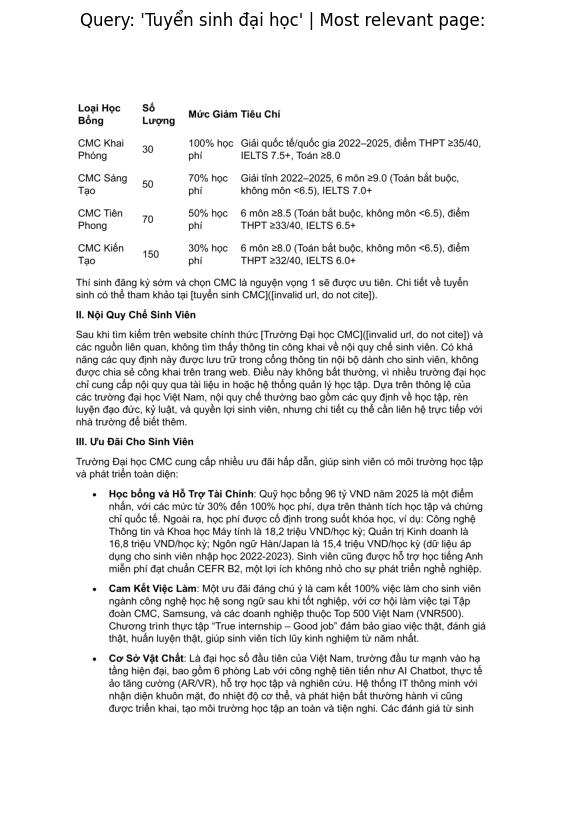

In [ ]:
import fitz

# Open PDF and load target page
pdf_path = "/content/drive/MyDrive/AI_DATA/Thông Tin Tuyển Sinh.pdf" # requires PDF to be downloaded
doc = fitz.open(pdf_path)
current_page = 2
page = doc.load_page(current_page)

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Optional: save the image
#img.save("output_filename.png")
doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()

In [ ]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    # Get Euclidean/L2 norm of each vector (removes the magnitude, keeps direction)
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

# Example tensors
vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# Calculate cosine similarity
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [ ]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query,
                                   convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Takes a query, retrieves most relevant resources and prints them out in descending order.

    Note: Requires pages_and_chunks to be formatted in a specific way (see above for reference).
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    print(f"Query: {query}\n")
    print("Results:")
    # Loop through zipped together scores and indicies
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        # Print the page number too so we can reference the textbook further and check the results
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [ ]:
query = "Học bổng"

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 35 embeddings: 0.00010 seconds.


(tensor([0.4567, 0.4276, 0.3763, 0.3498, 0.3360], device='cuda:0'),
 tensor([26, 28, 27, 12, 13], device='cuda:0'))

In [ ]:
# Print out the texts of the top scores
print_top_results_and_scores(query=query,
                             embeddings=embeddings)

[INFO] Time taken to get scores on 35 embeddings: 0.00008 seconds.
Query: Học bổng

Results:
Score: 0.4567
• Công nghệ thông tin: Ch Favored chuyên ngành Trí tuệ nhân tạo (AI) và Khoa học
dữ liệu. • Công nghệ tài chính (Fintech). • Kinh doanh số. • Thiết kế đồ họa.
Ngoài ra, trường còn đào tạo các ngành ngôn ngữ như Hàn Quốc, Nhật Bản, Trung
Quốc. Sinh viên có thể học song ngành nếu đáp ứng điều kiện về điểm số và thời
gian học tập. 4. Học phí và hỗ trợ tài chính Học phí Học phí tại Trường Đại học
CMC dao động từ 40 - 60 triệu VNĐ/năm, tùy theo ngành học.
Page number: 10


Score: 0.4276
Chương trình đào tạo Thời gian đào tạo Chương trình học kéo dài từ 3.5 - 4 năm,
tùy ngành và tiến độ học tập. Sinh viên có thể học vượt để rút ngắn thời gian
nếu đủ điều kiện. Hình thức học • Chủ yếu học trực tiếp tại trường. • Hỗ trợ học
online cho một số môn lý thuyết. • Không có chương trình đào tạo từ xa chính
quy. Nội dung đào tạo Chương trình chú trọng thực hành, với nhiều môn học kết
hợp dự án th

In [ ]:
!nvidia-smi

Wed Apr  9 03:14:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [ ]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb > 6:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"


print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: GemSUra-2B in 4-bit precision.
use_quantization_config set to: True
model_id set to: ura-hcmut/GemSUra-2B


### Connect and Verify Model from Hugging Face

In [ ]:
from huggingface_hub import notebook_login

# Log in to Hugging Face (replace 'YOUR_TOKEN' with your actual token)
notebook_login()

In [ ]:
# Install these if not already
# !pip install bitsandbytes
# !pip install huggingface_hub

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create quantization config for smaller model loading
# Requires !pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=False,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires !pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
#model_id = "google/gemma-7b-it"
model_id = "ricepaper/vi-gemma-2b-RAG"
print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=True, # use full memory
                                                 attn_implementation=attn_implementation, # which attention version to use
                                                 device_map="auto" ) # Let Transformers handle device placement

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: ricepaper/vi-gemma-2b-RAG


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear4bit(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (n

In [ ]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

1515268096

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    See: https://discuss.pytorch.org/t/gpu-memory-that-model-uses/56822
    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 2039632384, 'model_mem_mb': 1945.15, 'model_mem_gb': 1.9}

In [ ]:
input_text = "Tuyển sinh đại học"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
Tuyển sinh đại học

Prompt (formatted):
<bos><start_of_turn>user
Tuyển sinh đại học<end_of_turn>
<start_of_turn>model



In [ ]:
%%time

# Tokenize the input text (turn it into numbers) and send it to GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

# Generate outputs passed on the tokenized input
# See generate docs: https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/text_generation#transformers.GenerationConfig
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256) # define the maximum number of new tokens to create

print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[     2,      2,    106,   1645,    108, 152881,  18797,  21693,  35503,
          22796,    107,    108,    106,   2516,    108]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

Model output (tokens):
tensor([     2,      2,    106,   1645,    108, 152881,  18797,  21693,  35503,
         22796,    107,    108,    106,   2516,    108, 236108,  11747,  18977,
         35503,  22796,   5536,  10765,  83634,  83634,  18977,  10765,  68472,
         35576,  22796,  35503,  22796, 235265, 101981,  20117,  22796,  21693,
          5355,  14360,  10784,  35659,  18977,  10765,  68472,  35576,  35503,
         22796,  73368,  14360, 235269,  10435,  13452,  10765,  20117,  31355,
          5355,  14360,  10784,  35659,  18977,  10765,  68472,  35576,  22796,
         35503,  22796,  31355, 235265, 101981,  20117,  22796,  21693,   5355,
         14360,  10784,  35659,  18977,  10765,

In [ ]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
Tuyển sinh đại học<end_of_turn>
<start_of_turn>model
Đầu vào đại học là một bước bước vào một chương trình học đại học. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số

In [ ]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

Input text: Tuyển sinh đại học

Output text:
Đầu vào đại học là một bước bước vào một chương trình học đại học. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. Một số học sinh có thể được nhận vào một chương trình đại học cụ thể, trong khi một số khác có thể được nhận vào một chương trình học đại học khác. 

In [ ]:
# Python Data Science questions generated with GPT4
gpt4_questions = [
    "Chuyên ngành của trường gồm những gì",
    "Điểm để vào được trường",
]


# Manually created question list
manual_questions = [
    "Trường có kí túc xá không",
    "Trường có ưu đãi học bổng không",
    "Cơ sở vật chất của trường",
]

query_list = gpt4_questions + manual_questions

In [ ]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: Cơ sở vật chất của trường
[INFO] Time taken to get scores on 35 embeddings: 0.00007 seconds.


(tensor([0.5669, 0.5598, 0.5586, 0.5565, 0.5520], device='cuda:0'),
 tensor([26, 14, 21, 34,  6], device='cuda:0'))

In [ ]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """
      Based on the following context items, please answer the query.
      Give yourself room to think by extracting relevant passages from the context before answering the query.
      Don't return the thinking, only return the answer.
      Make sure your answers are as explanatory as possible.

      User query: {query}
      Answer:
    """


    # Update base prompt with context items and query
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: Trường có ưu đãi học bổng không
[INFO] Time taken to get scores on 35 embeddings: 0.00006 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.
      Give yourself room to think by extracting relevant passages from the context before answering the query.
      Don't return the thinking, only return the answer.
      Make sure your answers are as explanatory as possible.

      User query: Trường có ưu đãi học bổng không
      Answer:<end_of_turn>
<start_of_turn>model



In [ ]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # lower temperature = more deterministic outputs, higher temperature = more creative outputs
                             do_sample=True, # whether or not to use sampling, see https://huyenchip.com/2024/01/16/sampling.html for more
                             max_new_tokens=256) # how many new tokens to generate from prompt

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

Query: Trường có ưu đãi học bổng không
RAG answer:
<bos>Đầu vào của trường đại học có quyền lợi đối với người sáng lập trường - một phần nhỏ trong số 35000 trong số 8000 học sinh, và một vài học sinh từ các đại học khác. Một trong số 16000 học sinh có 12500 trong số 7500 và 8500 trong số 20. Đa số được gọi là "một số ít" vì đại học có thể có nhiều (tuy nhiên, một số này có thể rất nhỏ), và hơn một nửa (50% tất cả các học sinh) có thể sở hữu một căn hộ ở chính tại nhà. Năm 2006, các học sinh đã sở hữu một căn hộ trung bình là 500 USD (phần còn lại sẽ là 500 USD). Một số học sinh ở đây không có nhà ở được nhận được một số tiền. Các học sinh có một số tiền được đặt vào năm 2010 là 1.063 USD; 2011 là 1.120 USD; 2012 là 1.313 USD; 2013 là 
CPU times: user 7.67 s, sys: 0 ns, total: 7.67 s
Wall time: 7.66 s


In [ ]:
def ask(query,
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU

    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text

    return output_text, context_items

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context
answer, context_items = ask(query=query,
                            temperature=0.7,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print_wrapped(answer)
print(f"Context items:")
context_items

## Host Pipeline bằng Flask API

In [ ]:
!pip install Flask

ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


## Chạy Flask App

In [ ]:
from flask import Flask, request, jsonify
import torch
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForCausalLM

# Initialize Flask app
app = Flask(__name__)

# # Load my  models (make sure they are the same as in my  RAG pipeline)
# embedding_model = SentenceTransformer("all-mpnet-base-v2")
# tokenizer = AutoTokenizer.from_pretrained("ricepaper/vi-gemma-2b-RAG")
# llm_model = AutoModelForCausalLM.from_pretrained("ricepaper/vi-gemma-2b-RAG", torch_dtype=torch.float16)
# llm_model.to("cuda")

# # Load my  embeddings (make sure they are the same as in my  RAG pipeline)
# embeddings = torch.load("embeddings.pt")

def retrieve_relevant_resources(query: str, n_resources_to_return: int = 5):
    query_embedding = embedding_model.encode(query, convert_to_tensor=True)
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    scores, indices = torch.topk(input=dot_scores, k=n_resources_to_return)
    return scores, indices

def prompt_formatter(query: str, context_items: list):
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])
    base_prompt = f"""
    Based on the following context items, please answer the query.
    User query: {query}
    Context:
    {context}
    Answer:"""
    return base_prompt

@app.route('/generate', methods=['POST'])
def generate():
    data = request.json
    query = data.get('query', '')

    # Retrieve relevant resources
    scores, indices = retrieve_relevant_resources(query)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Format the prompt with context items
    prompt = prompt_formatter(query=query, context_items=context_items)

    # Tokenize and generate the response
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = llm_model.generate(**input_ids, max_new_tokens=256)
    output_text = tokenizer.decode(outputs[0])

    # Clean up the response and return it
    response_text = output_text.replace(prompt, "").strip()
    return jsonify({'query': query, 'response': response_text})



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!pip install flask-ngrok

In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("2v9nlPnspNR4vi2fOY8kaTZBSK0_6c6RNqzfLQBJWUtcoqMEF")

# Start ngrok
public_url = ngrok.connect(8080)
print(f"Public URL: {public_url}")

# Run your Flask app
app.run()

# default: curl -X POST http://<your-ngrok-url>.ngrok.io/generate -H "Content-Type: application/json" -d '{"query": "What is linear regression?"}'
# curl -X POST http://127.0.0.1:5000.ngrok.io/generate -H "Content-Type: application/json" -d '{"query": "What is linear regression?"}'

Public URL: NgrokTunnel: "https://af42-34-125-102-229.ngrok-free.app" -> "http://localhost:8080"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


# Phiên bản ngắn gọn hơn


In [ ]:
from huggingface_hub import notebook_login

# Log in to Hugging Face (replace 'YOUR_TOKEN' with your actual token)
notebook_login()

In [ ]:
# Cài đặt các thư viện
!pip install PyMuPDF sentence-transformers torch transformers accelerate numpy

# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Đọc file PDF
import fitz
pdf_path = '/content/drive/MyDrive/AI_DATA/Thông Tin Tuyển Sinh.pdf'  # Thay bằng đường dẫn của bạn
doc = fitz.open(pdf_path)
text = ""
for page in doc:
    text += page.get_text()
doc.close()

# Phân đoạn văn bản
def chunk_text(text, chunk_size=500):
    return [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

chunks = chunk_text(text)

# Nhúng văn bản
from sentence_transformers import SentenceTransformer
import numpy as np
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(chunks, convert_to_tensor=True).cpu().numpy()

# Truy xuất vector
from numpy.linalg import norm
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def retrieve_relevant_chunks(query, embeddings, chunks, top_k=3):
    query_embedding = embedding_model.encode(query, convert_to_tensor=True).cpu().numpy()
    similarities = [cosine_similarity(query_embedding, emb) for emb in embeddings]
    top_indices = np.argsort(similarities)[-top_k:][::-1]
    return [chunks[i] for i in top_indices], [similarities[i] for i in top_indices]

# Tải LLM
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
model_name = "ura-hcmut/GemSUra-2B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", torch_dtype=torch.float16)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Sinh câu trả lời
def generate_response(query, chunks, similarities):
    context = "\n".join([f"Đoạn {i+1} (độ tương đồng: {sim:.2f}): {chunk}" for i, (chunk, sim) in enumerate(zip(chunks, similarities))])
    prompt = f"""Bạn là trợ lý tuyển sinh đại học. Dựa trên thông tin sau từ tài liệu tuyển sinh, hãy trả lời câu hỏi: "{query}"

Thông tin:
{context}

Câu trả lời: """
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = model.generate(**inputs, max_new_tokens=150, temperature=0.7, do_sample=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True).split("Câu trả lời:")[-1].strip()

# Thử nghiệm
query = "Học phí của trường bao nhiêu một năm?"
relevant_chunks, similarities = retrieve_relevant_chunks(query, embeddings, chunks)
response = generate_response(query, relevant_chunks, similarities)
print(f"Truy vấn: {query}")
print(f"Câu trả lời: {response}")

  Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidi

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

Truy vấn: Học phí của trường bao nhiêu một năm?
Câu trả lời: 18,2 triệu VNĐ/học kỳ.


In [ ]:
# Thử nghiệm
query = "Trường có quy định gì về học bổng"
relevant_chunks, similarities = retrieve_relevant_chunks(query, embeddings, chunks)
response = generate_response(query, relevant_chunks, similarities)
print(f"Truy vấn: {query}")
print(f"Câu trả lời: {response}")

Truy vấn: Trường có quy định gì về học bổng
Câu trả lời: • 
Học bổng: Căn cứ vào điểm thi đầu vào, sinh viên được hỗ trợ 
học phí từ 25% - 100% (dựa trên thành tích học tập). 
• 
Hỗ trợ đặc biệt: Sinh viên khuyết tật được hỗ trợ về cơ sở vật chất, học phí và 
phương pháp học tập phù hợp.
